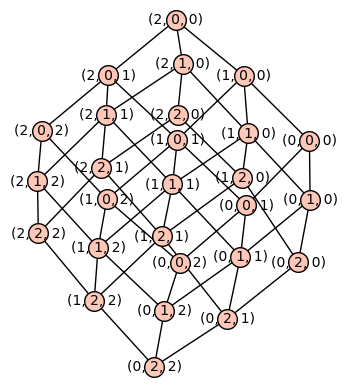

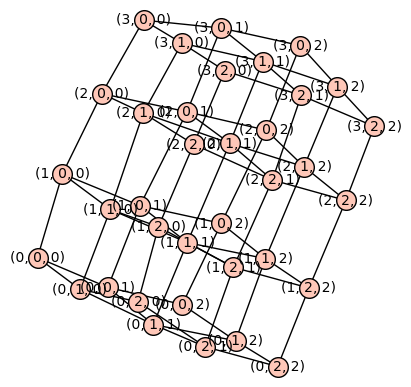

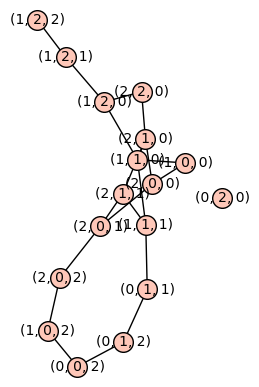

3.0

In [7]:
from sage.graphs.connectivity import connected_components
from sage.graphs.connectivity import connected_components_number

#m x n mreža, a št. izbrisanih vozlov, b št.izrbirsanih povezav
def mreza(m,n,o,a,b):
    mreza = graphs.GridGraph([m,n,o])
    if a > mreza.order():
        print("Za ukaz je na voljo premalo vozlov.")
    else:
        i = 0
        while i < a:
            mreza.delete_vertex(mreza.random_vertex())
            i = i+1
        i = 0
    if b > mreza.size():
        print("Za ukaz je na voljo premalo povezav.")
    else:
        while i < b:
            mreza.delete_edge(mreza.random_edge())
            i = i+1
    return mreza

#reši CLP problem in vrne k
def najkrajsa_razdalja(G, st_centrov):
    K = st_centrov
    razdalje = G.distance_all_pairs()

    p = MixedIntegerLinearProgram(maximization=False)
    x = p.new_variable(binary=True) #x_uv = 1 če mesto u spada k skladišču v (mestu v s skladiščem)
    y = p.new_variable(binary=True) # y_v = 1 če je v mestu v skladišče

    p.set_objective(p['R']) # največja razdalja je spremenljivka

    for u in G:
        p.add_constraint(sum(x[u, v] for v in G) == 1) #za vsako mesto u bo veljalo, da spada pod neko območje mesta v s skladiščem

    p.add_constraint(sum(y[v] for v in G) == K) #vsota skladišč je enaka K

    for u in G:
        for v in G:
            p.add_constraint(x[u, v] <= y[v]) #ne sme se zgoditi, da mesto u pade v območje mesta v, v mestu v pa sploh ni skladišča

    for u in G:
        for v in G:
            if v in razdalje[u]:
                p.add_constraint(razdalje[u][v] * x[u, v] <= p['R']) # če sta vozlišči v isti povezani komponenti, potem omejimo največjo razdaljo                                                                        do skladišča
            else:
                p.add_constraint(x[u, v] == 0) # sicer mesto u ne more pripadati skladišču v
    max_razdalja = p.solve()
    skladisca = [k for k, v in p.get_values(y).items() if v == 1]
    #print(skladisca)
    return max_razdalja

#G = graphs.GridGraph([2,2,2])
#G.show()
#G2 = graphs.GridGraph([3,3,3])
#G2.show()
#najkrajsa_razdalja(G2, 3)


G1 = mreza(3,3,3,0,0)
G1.show()

G2 = mreza(4,3,3,0,0)
G2.show()

G = mreza(3,3,3,10,2)
G.show()
najkrajsa_razdalja(G,3)

In [8]:
#FIKSNO: st. izbrisanih vozlisc in povezav
#SPREMINJAVA: velikost mreze in maximalno stevilo K-jev
#velikost mreže narašča od 2x2x2 do nxnxn
#VRNE matriko: v a_ij pove povprecni R (za n ponovitev) pri mreži ixixi, ki ima j centrov
def R_v_odvisnosti_od_velikosti_kvadratne_mreze_in_k(n,a,b,max_k,stevilo_ponovitev):
    seznam = [] # i-ti element tega seznama pove povprecne R-je za razlicne k-je za ixi matriko
    for i in range(2, n+1):
        seznam1 = [] #seznam povprecnega R za stevilo_centrov = j
        for j in range(1, max_k + 1):
            seznam2 = []
            for p in range(stevilo_ponovitev):
                G = mreza(i,i,i,a,b)
                stevilo_komponent = connected_components_number(G)
                if stevilo_komponent <= j: #st. komponent <= k (st.centrov) (v tem primeru j)
                    razdalja = round(najkrajsa_razdalja(G, j))
                    seznam2.append(razdalja)
                else:
                    seznam2.append(None)

            vsota = 0
            stevec = 0
            povprecje = 0
            for v in range(len(seznam2)):
                if seznam2[v] != None:
                    vsota += seznam2[v]
                    stevec += 1
            if stevec == 0:
                povprecje = None
            else:
                povprecje = vsota/stevec

            seznam1.append(povprecje)

        seznam.append(seznam1)

    return seznam

R_v_odvisnosti_od_velikosti_kvadratne_mreze_in_k(4,0,0,5,1)

In [5]:
#FIKSNO: st. izbrisanih vozlisc in povezav
#SPREMINJAVA: velikost mreze in maximalno stevilo K-jev
#velikost mreže narašča od mxnxo1 do mxnxo2
#VRNE matriko: v a_ij pove povprecni R (za n ponovitev) pri mreži mxnxi, ki ima j centrov
def R_v_odvisnosti_od_velikosti_mreze_in_k(m,n,o1,o2,a,b,max_k,stevilo_ponovitev):
    seznam = [] # i-ti element tega seznama pove povprecne R-je za razlicne k-je za ixi matriko
    for i in range(o1, o2+1):
        seznam1 = [] #seznam povprecnega R za stevilo_centrov = j
        for j in range(1, max_k + 1):
            seznam2 = []
            for p in range(stevilo_ponovitev):
                G = mreza(m,n,i,a,b)
                stevilo_komponent = connected_components_number(G)
                if stevilo_komponent <= j: #st. komponent <= k (st.centrov) (v tem primeru j)
                    razdalja = round(najkrajsa_razdalja(G, j))
                    seznam2.append(razdalja)
                else:
                    seznam2.append(None)

            vsota = 0
            stevec = 0
            povprecje = 0
            for v in range(len(seznam2)):
                if seznam2[v] != None:
                    vsota += seznam2[v]
                    stevec += 1
            if stevec == 0:
                povprecje = None
            else:
                povprecje = vsota/stevec

            seznam1.append(povprecje)

        seznam.append(seznam1)

    return seznam

R_v_odvisnosti_od_velikosti_mreze_in_k(3,3,3,3,0,0,10,1)

[[3.0, 3.0, 2.0, 2.0, 2.0, 1.0, 1.0, 1.0, 1.0, 1.0]]

In [8]:
R_v_odvisnosti_od_velikosti_mreze_in_k(4,3,3,3,0,0,10,1)

[[4.0, 3.0, 3.0, 2.0, 2.0, 2.0, 2.0, 1.0, 1.0, 1.0]]

In [10]:
R_v_odvisnosti_od_velikosti_mreze_in_k(3,3,3,3,1,0,6,1)

[[3.0, 3.0, 2.0, 2.0, 2.0, 1.0]]

In [11]:
R_v_odvisnosti_od_velikosti_mreze_in_k(3,3,3,3,1,0,6,3)

[[3.0, 3.0, 2.0, 2.0, 2.0, 1.0]]

In [12]:
R_v_odvisnosti_od_velikosti_mreze_in_k(3,3,3,3,2,0,6,3)

[[3.0, 3.0, 2.0, 2.0, 2.0, 1.0]]

In [4]:
import time

#FIKSNO: st. izbrisanih vozlisc in povezav
#SPREMINJAVA: velikost mreze in maximalno stevilo K-jev
#velikost mreže narašča od mxnxo1 do mxnxo2
#VRNE matriko: v a_ij pove povprecni cas (za n ponovitev) pri mreži mxnxi, ki ima j centrov
def cas_v_odvisnosti_od_velikosti_mreze_in_k(m,n,o1,o2,a,b,max_k,stevilo_ponovitev):
    seznam = [] # i-ti element tega seznama pove povprecne R-je za razlicne k-je za ixi matriko
    for i in range(o1, o2+1):
        seznam1 = [] #seznam povprecnega R za stevilo_centrov = j
        for j in range(1, max_k + 1):
            seznam2 = []
            for p in range(stevilo_ponovitev):
                G = mreza(m,n,i,a,b)
                stevilo_komponent = connected_components_number(G)
                if stevilo_komponent <= j: #st. komponent <= k (st.centrov) (v tem primeru j)
                    zacetni = time.time()
                    razdalja = round(najkrajsa_razdalja(G, j))
                    koncni = time.time() - zacetni
                    seznam2.append(koncni)
                else:
                    seznam2.append(None)

            vsota = 0
            stevec = 0
            povprecje = 0
            for v in range(len(seznam2)):
                if seznam2[v] != None:
                    vsota += seznam2[v]
                    stevec += 1
            if stevec == 0:
                povprecje = None
            else:
                povprecje = vsota/stevec

            seznam1.append(povprecje)

        seznam.append(seznam1)

    return seznam

cas_v_odvisnosti_od_velikosti_mreze_in_k(4,3,3,3,0,0,10,1)

[[1.6993153095245361,
  29.09699773788452,
  46.4828679561615,
  48.2749240398407,
  55.68004059791565,
  61.543983936309814,
  65.75518798828125,
  66.11482667922974,
  68.91637325286865,
  70.79530596733093]]